# Part I : Data conditioning

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read in the data
df = pd.read_csv('./src/car_dataset_origin.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:

df = df.rename(columns={'symboling': 'etat_de_route', 'CarName': 'marque_voiture', 'fueltype': 'carburant', 'aspiration': 'turbo', 'doornumber': 'nombre_portes', 'carbody': 'type_vehicule', 'drivewheel': 'transmission', 'enginelocation': 'emplacement_moteur', 'wheelbase': 'empattement', 'carlength': 'longueur_voiture', 'carwidth': 'largeur_voiture', 'carheight': 'hauteur_voiture', 'curbweight': 'poids_vehicule', 'enginetype': 'type_moteur', 'cylindernumber': 'nombre_cylindres', 'enginesize': 'taille_moteur', 'fuelsystem': 'systeme_carburant', 'boreratio': 'taux_alésage', 'stroke': 'course', 'compressionratio': 'taux_compression', 'horsepower': 'chevaux', 'peakrpm': 'tour_moteur', 'citympg': 'consommation_ville', 'highwaympg': 'consommation_autoroute', 'price': 'prix'})

df.columns

Index(['car_ID', 'etat_de_route', 'marque_voiture', 'carburant', 'turbo',
       'nombre_portes', 'type_vehicule', 'transmission', 'emplacement_moteur',
       'empattement', 'longueur_voiture', 'largeur_voiture', 'hauteur_voiture',
       'poids_vehicule', 'type_moteur', 'nombre_cylindres', 'taille_moteur',
       'systeme_carburant', 'taux_alésage', 'course', 'taux_compression',
       'chevaux', 'tour_moteur', 'consommation_ville',
       'consommation_autoroute', 'prix'],
      dtype='object')

In [6]:
df.drop(['car_ID'], axis=1, inplace=True)

## Analyze marque_voiture column

In [7]:
df['marque_voiture'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [8]:
# Split the marque_voiture column into marque and modele
df['marque_voiture'] = df['marque_voiture'].str.strip()
df[['marque', 'modele']] = df['marque_voiture'].str.split(' ', 1, expand=True)
df.drop('marque_voiture', axis=1, inplace=True)

/var/folders/d0/hykm8r4n4ygf9ms5__0w6f1r0000gn/T/ipykernel_10690/1816901120.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['marque', 'modele']] = df['marque_voiture'].str.split(' ', 1, expand=True)


In [9]:
def correct_brands(name : str) -> str:
    if "v" in name and "w" in name :
        return "volkswagen"
    elif 'p' in name and "o" in name and "r" in name and "h" in name:
        return 'porsche'
    elif 't' in name and "o" in name and "y" in name and "a" in name:
        return 'toyota'
    elif "m" in name  and "d" in name  and "a" in name:
        return 'mazda'
    elif 'alfa' in name:
        return 'alfa-romeo'
    else:
        return name.lower()
    
df['marque'] = df['marque'].apply(correct_brands)

In [10]:
df

,etat_de_route,carburant,turbo,nombre_portes,type_vehicule,transmission,emplacement_moteur,empattement,longueur_voiture,largeur_voiture,...,taux_alésage,course,taux_compression,chevaux,tour_moteur,consommation_ville,consommation_autoroute,prix,marque,modele
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


## Carburant column

In [11]:
# Want rename gas to essence
df['carburant'] = df['carburant'].replace('gas', 'essence')
df['carburant'].unique()

array(['essence', 'diesel'], dtype=object)

## nombre_portes colunm - Change values

In [12]:
df['nombre_portes'].unique()

array(['two', 'four'], dtype=object)

In [13]:
# Replace the values in the nombre_portes column
df['nombre_portes'] = df['nombre_portes'].replace({'two': 2, 'four': 4})

## type_vehicule column - Change values

In [14]:
df['type_vehicule'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
df['type_vehicule'] = df['type_vehicule'].replace({'convertible': 'cabriolet', 'hatchback': 'hayon', 'sedan': 'berline', 'wagon': 'break', 'hardtop': 'coupé'})

In [16]:
df['type_vehicule'].unique()

array(['cabriolet', 'hayon', 'berline', 'break', 'coupé'], dtype=object)

## transmission column - change values

In [17]:
df['transmission'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [18]:
df['transmission'] = df['transmission'].replace({'rwd': 'propulsion', 'fwd': 'traction', '4wd': 'quatre_roues_motrices'})

## emplacement_moteur column - change values

In [19]:
df['emplacement_moteur'].unique()

array(['front', 'rear'], dtype=object)

In [20]:
df['emplacement_moteur'] = df['emplacement_moteur'].replace({'front': 'avant', 'rear': 'arrière'})

## turbo column - Change values

In [21]:
df['turbo'].unique()

array(['std', 'turbo'], dtype=object)

In [22]:
df['turbo'] = df['turbo'].replace({'std': 'Non', 'turbo': 'Oui'})

## Convert values inches to centimeters

In [23]:
def convert_to_centimeters(value):
    return value * 2.54

### Before convert

In [24]:
df['longueur_voiture'].unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

In [25]:
df['largeur_voiture'].unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

In [26]:
df['hauteur_voiture'].unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

In [27]:
df['empattement'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [28]:
df['longueur_voiture'], df['largeur_voiture'], df['hauteur_voiture'], df['empattement'] = df['longueur_voiture'].apply(convert_to_centimeters), df['largeur_voiture'].apply(convert_to_centimeters), df['hauteur_voiture'].apply(convert_to_centimeters), df['empattement'].apply(convert_to_centimeters)

### After convert

In [29]:
df['longueur_voiture'].unique()

array([428.752, 434.848, 448.564, 450.342, 489.458, 452.628, 449.072,
       480.06 , 492.252, 500.38 , 358.394, 395.986, 403.352, 399.542,
       443.484, 439.928, 367.284, 381.   , 415.036, 399.034, 425.45 ,
       445.516, 429.514, 433.578, 438.404, 506.984, 486.918, 404.114,
       423.672, 429.26 , 451.612, 444.5  , 484.886, 476.25 , 514.604,
       457.962, 528.574, 505.968, 453.136, 439.42 , 437.896, 419.862,
       432.308, 420.624, 412.496, 440.436, 461.518, 468.884, 453.39 ,
       474.218, 505.206, 424.942, 429.006, 446.278, 461.01 , 473.964,
       398.526, 401.066, 436.88 , 440.69 , 440.944, 403.098, 431.038,
       422.402, 428.498, 447.548, 446.024, 466.09 , 477.012, 436.118,
       404.622, 420.878, 457.708, 465.074, 479.552])

In [30]:
df['largeur_voiture'].unique()

array([162.814, 166.37 , 168.148, 168.656, 168.402, 181.356, 172.466,
       164.592, 169.926, 180.086, 153.162, 161.544, 162.052, 164.084,
       162.306, 162.56 , 165.608, 158.75 , 167.64 , 156.972, 176.784,
       179.324, 163.068, 166.878, 168.91 , 167.894, 178.562, 182.118,
       179.07 , 182.88 , 172.72 , 163.576, 166.116, 173.736, 173.482,
       165.1  , 183.642, 169.164, 161.036, 166.624, 171.958, 170.688,
       175.006, 174.752])

In [31]:
df['hauteur_voiture'].unique()

array([123.952, 133.096, 137.922, 134.874, 141.478, 141.986, 132.08 ,
       136.398, 143.002, 135.128, 129.032, 128.524, 151.892, 127.508,
       133.604, 138.43 , 148.082, 135.382, 137.414, 129.54 , 135.89 ,
       130.556, 134.112, 121.412, 125.984, 140.97 , 138.176, 143.51 ,
       149.098, 139.446, 144.018, 140.716, 139.192, 125.476, 131.064,
       138.938, 139.954, 142.494, 126.238, 142.24 , 128.27 , 140.208,
       133.35 , 134.62 , 150.114, 136.906, 141.224, 142.748, 146.05 ])

In [32]:
df['empattement'].unique()

array([225.044, 240.03 , 253.492, 252.476, 268.732, 252.73 , 257.048,
       262.89 , 279.4  , 224.536, 237.998, 262.382, 243.586, 219.964,
       245.11 , 239.522, 243.84 , 287.02 , 259.08 , 236.474, 242.062,
       250.952, 266.446, 271.018, 293.624, 245.364, 307.086, 284.48 ,
       260.858, 236.22 , 244.602, 241.554, 246.888, 255.016, 231.902,
       251.968, 274.066, 290.068, 274.32 , 227.33 , 249.936, 244.094,
       251.714, 236.982, 246.38 , 246.126, 243.078, 260.096, 261.366,
       265.43 , 247.142, 264.922, 277.114])

In [33]:
df.head()

,etat_de_route,carburant,turbo,nombre_portes,type_vehicule,transmission,emplacement_moteur,empattement,longueur_voiture,largeur_voiture,...,taux_alésage,course,taux_compression,chevaux,tour_moteur,consommation_ville,consommation_autoroute,prix,marque,modele
0,3,essence,Non,2,cabriolet,propulsion,avant,225.044,428.752,162.814,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,giulia
1,3,essence,Non,2,cabriolet,propulsion,avant,225.044,428.752,162.814,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,stelvio
2,1,essence,Non,2,hayon,propulsion,avant,240.030,434.848,166.370,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,Quadrifoglio
3,2,essence,Non,4,berline,traction,avant,253.492,448.564,168.148,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,essence,Non,4,berline,quatre_roues_motrices,avant,252.476,448.564,168.656,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


## Convert values pound to kg

In [34]:
df.columns

Index(['etat_de_route', 'carburant', 'turbo', 'nombre_portes', 'type_vehicule',
       'transmission', 'emplacement_moteur', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_vehicule', 'type_moteur',
       'nombre_cylindres', 'taille_moteur', 'systeme_carburant',
       'taux_alésage', 'course', 'taux_compression', 'chevaux', 'tour_moteur',
       'consommation_ville', 'consommation_autoroute', 'prix', 'marque',
       'modele'],
      dtype='object')

In [35]:
def convert_pounds_to_kilograms(value):
    return value * 0.453592

In [36]:
df['poids_vehicule'] = df['poids_vehicule'].apply(convert_pounds_to_kilograms)

In [37]:
df['poids_vehicule'].unique()

array([1155.752416, 1280.490216, 1060.044504, 1280.943808, 1137.155144,
       1290.015648, 1339.910768, 1399.784912, 1384.816376, 1086.35284 ,
       1229.23432 , 1254.18188 , 1385.72356 , 1465.10216 , 1533.14096 ,
       1589.83996 ,  674.944896,  850.031408,  865.907128,  850.938592,
        965.243776,  892.215464,  902.194488,  993.820072, 1149.85572 ,
       1275.047112,  777.003096,  825.083848,  833.248504,  879.96848 ,
        887.225952,  911.71992 ,  918.070208, 1014.231712, 1038.272088,
       1045.075968, 1075.920224, 1118.10428 , 1040.086456, 1240.120528,
       1844.305072, 1791.6884  ,  857.28888 ,  861.8248  ,  864.09276 ,
        882.23644 ,  884.5044  , 1079.54896 , 1081.81692 , 1133.98    ,
       1093.15672 , 1108.125256, 1099.9606  , 1211.09064 , 1224.6984  ,
       1594.37588 , 1700.97    , 1585.30404 , 1710.04184 , 1696.43408 ,
       1671.48652 , 1769.0088  , 1685.09428 , 1319.95272 ,  869.989456,
        881.782848,  908.998368,  972.95484 , 1075.01304 , 1055.

## nombre_cylindres column - Change values

In [38]:
df['nombre_cylindres'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: nombre_cylindres, dtype: int64

In [39]:
df['nombre_cylindres'] = df['nombre_cylindres'].replace({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

## taille_moteur column - Convert values

In [40]:
def convert_cubic_inches_to_liters(value):
    """Convert cubic inches to liters and round to 1 deciimal place"""
    return round(value * 0.0163871, 1)

In [41]:
df['taille_moteur'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145])

In [42]:
df['taille_moteur'] = df['taille_moteur'].apply(convert_cubic_inches_to_liters)

In [43]:
df['taille_moteur'].unique()

array([2.1, 2.5, 1.8, 2.2, 2.7, 3.4, 1. , 1.5, 1.6, 2. , 2.6, 1.3, 4.2,
       5.3, 1.1, 2.3, 3. , 3.8, 5. , 1.7, 3.2, 3.3, 2.4, 2.8])

## Convert mpg to l_100km

In [44]:
def convert_mpg_to_l_100km(value):
    """Convert miles per gallon to liters per 100 kilometers"""
    return round(235.215 / value, 1)

In [45]:
df['consommation_ville'].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33])

In [46]:
df['consommation_autoroute'].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46])

In [47]:
df['consommation_ville'], df['consommation_autoroute'] = df['consommation_ville'].apply(convert_mpg_to_l_100km), df['consommation_autoroute'].apply(convert_mpg_to_l_100km)

In [48]:
df['consommation_ville'].unique()

array([11.2, 12.4,  9.8, 13.1, 13.8, 14.7, 10.2, 11.8, 15.7,  5. ,  6.2,
        6.4,  7.6,  4.8,  7.8,  8.7,  9.4, 18.1,  9. ,  6.5, 10.7, 16.8,
        5.2,  8.4,  7.4,  6.7,  6.9,  8.1,  7.1])

In [49]:
df['consommation_autoroute'].unique()

array([ 8.7,  9. ,  7.8, 10.7,  9.4, 11.8,  8.1,  8.4,  4.4,  5.5,  5.7,
        6.2,  9.8,  5.6,  6.9,  7.1,  7.6, 12.4, 13.8, 10.2,  7.4,  6. ,
       13.1, 14.7,  6.4,  4.7,  6.5,  5. ,  5.1])

In [50]:
df.columns

Index(['etat_de_route', 'carburant', 'turbo', 'nombre_portes', 'type_vehicule',
       'transmission', 'emplacement_moteur', 'empattement', 'longueur_voiture',
       'largeur_voiture', 'hauteur_voiture', 'poids_vehicule', 'type_moteur',
       'nombre_cylindres', 'taille_moteur', 'systeme_carburant',
       'taux_alésage', 'course', 'taux_compression', 'chevaux', 'tour_moteur',
       'consommation_ville', 'consommation_autoroute', 'prix', 'marque',
       'modele'],
      dtype='object')

# Part II : Data Analyze

/var/folders/d0/hykm8r4n4ygf9ms5__0w6f1r0000gn/T/ipykernel_10690/501292890.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().loc[['prix'],:], annot=True, cmap='coolwarm')


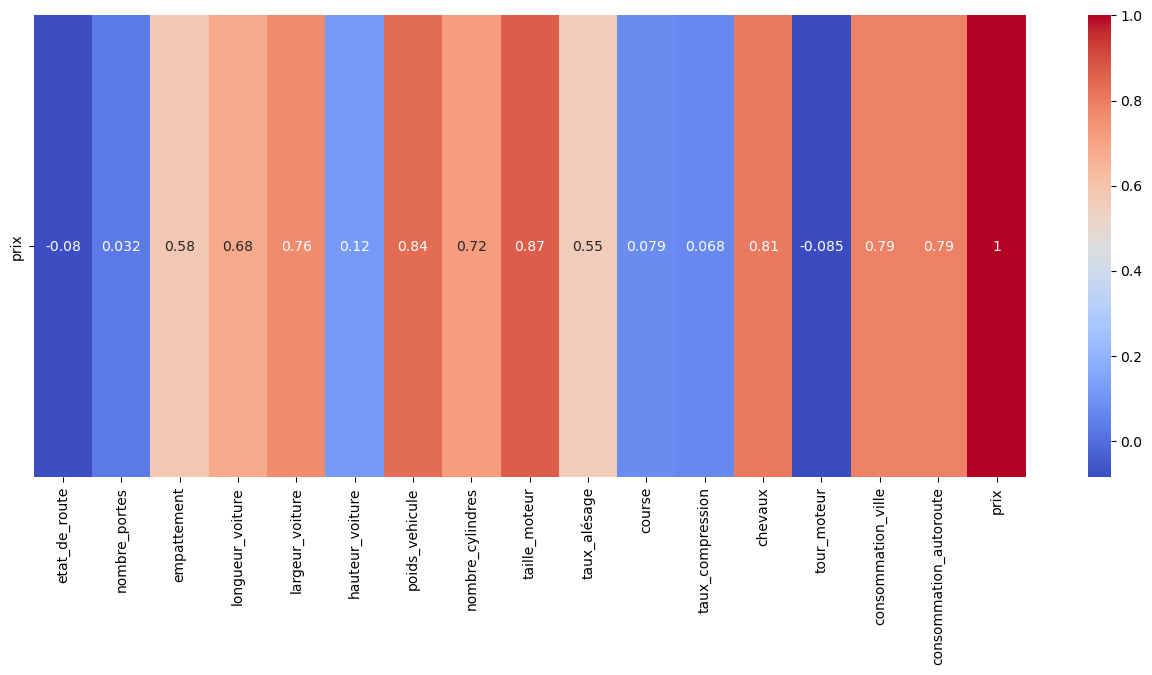

In [51]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr().loc[['prix'],:], annot=True, cmap='coolwarm')
plt.show()

/var/folders/d0/hykm8r4n4ygf9ms5__0w6f1r0000gn/T/ipykernel_10690/4241908980.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


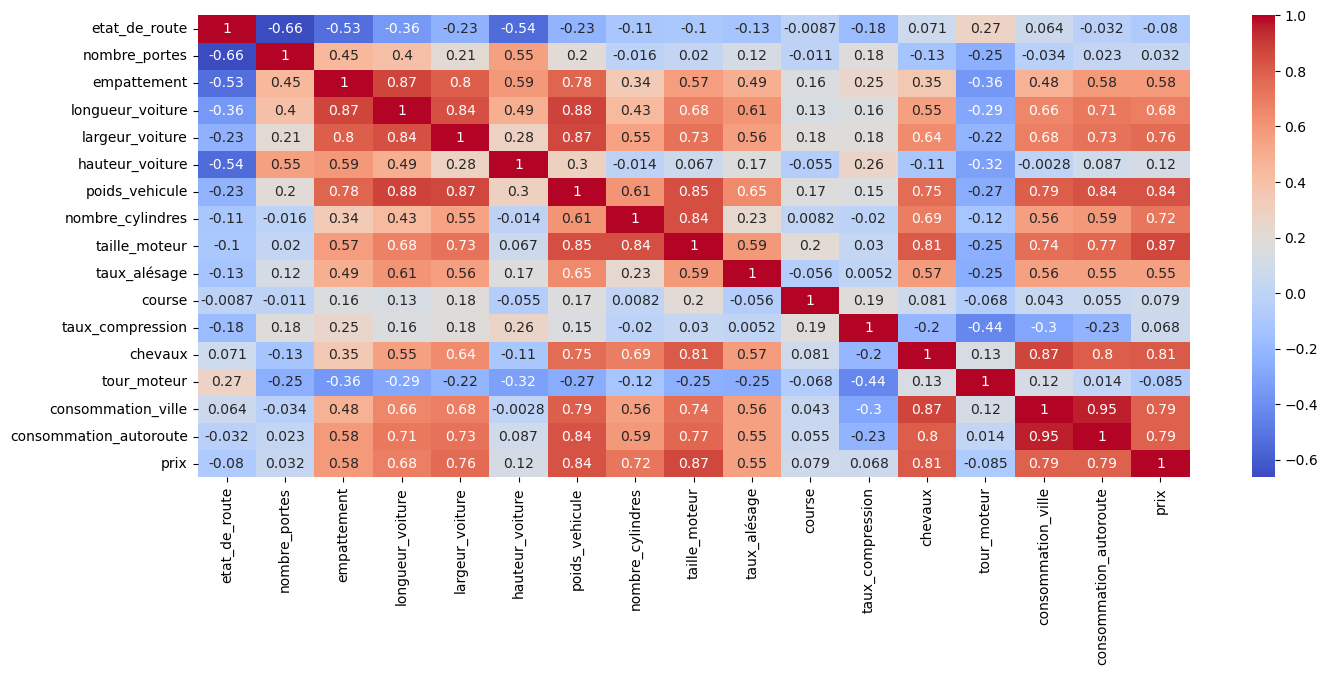

In [52]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Grâce à cette heatmap de la matrice de corrélation de toutes les variables du dataframe. Elle permet de visualiser les relations linéaires entre les variables en utilisant une échelle de couleurs pour indiquer la force de la corrélation (allant de rouge foncé pour une corrélation positive forte à bleu foncé pour une corrélation négative forte). On peut voir que la variable prix est fortement corrélée avec certaines variables telles que la puissance du moteur, la taille du moteur, le poids du véhicule et le taux de compression.

## Histogram

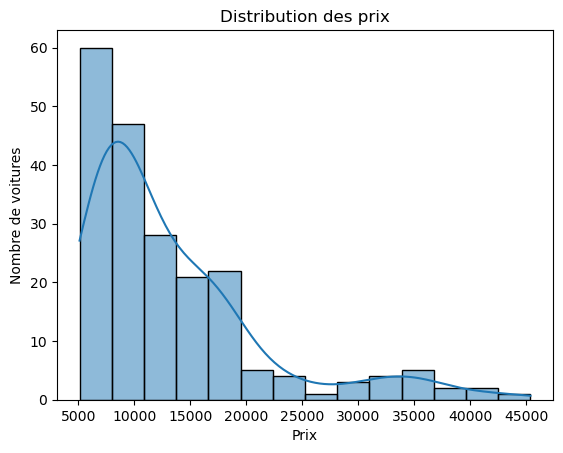

In [53]:
sns.histplot(df['prix'], kde=True)
plt.xlabel('Prix')
plt.ylabel('Nombre de voitures')
plt.title('Distribution des prix')
plt.show()

Dans ce graphique, nous pouvons voir que la plupart des voitures sont vendues à des prix compris entre 5 000 et 20 000 dollars environ. La distribution a une légère asymétrie positive, ce qui signifie qu'il y a plus de voitures avec des prix inférieurs à la moyenne que de voitures avec des prix supérieurs à la moyenne.

|--------------------------------------------------------------------------------------------------------------------------------------|

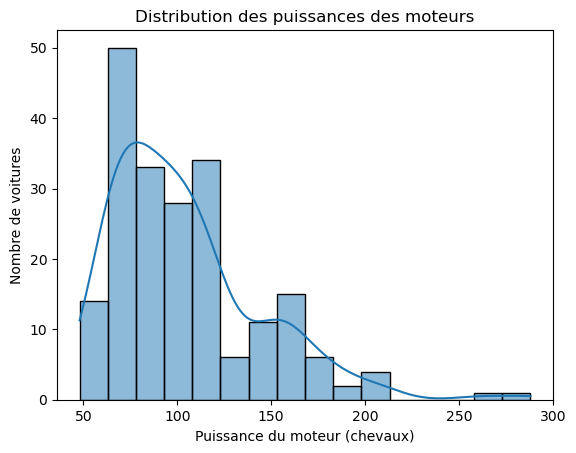

In [54]:
sns.histplot(df['chevaux'], kde=True)
plt.xlabel('Puissance du moteur (chevaux)')
plt.ylabel('Nombre de voitures')
plt.title('Distribution des puissances des moteurs')
plt.show()

Le graphique montre une distribution avec une asymétrie positive, ce qui signifie que la majorité des voitures ont une puissance de moteur relativement faible, tandis que les valeurs plus élevées de puissance de moteur sont moins fréquentes. On peut également observer que la distribution est légèrement remontée vers la droite, ce qui suggère qu'il y a quelques voitures avec des puissances de moteur très élevées, mais entre 210 et 260 un vide.

|--------------------------------------------------------------------------------------------------------------------------------------|

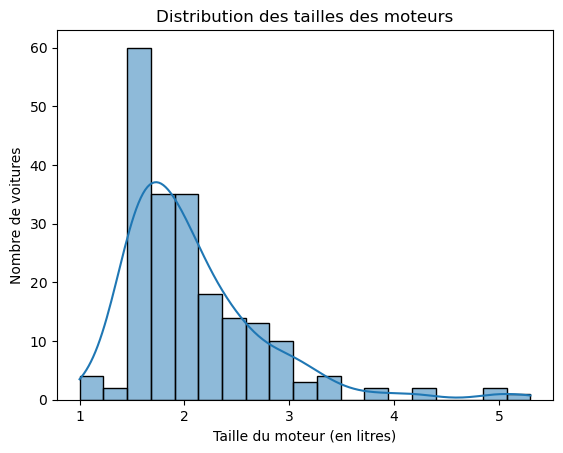

In [55]:
sns.histplot(df['taille_moteur'], kde=True)
plt.xlabel('Taille du moteur (en litres)')
plt.ylabel('Nombre de voitures')
plt.title('Distribution des tailles des moteurs')
plt.show()

Ici nous avons une distribution avec également une asymétrie positive, ce qui signifie que la majorité des voitures ont une taille de moteur relativement faible (comprise environ entre 1.5l et 2l), tandis que les valeurs plus élevées de taille de moteur sont moins fréquentes.

|--------------------------------------------------------------------------------------------------------------------------------------|

## Scatterplot

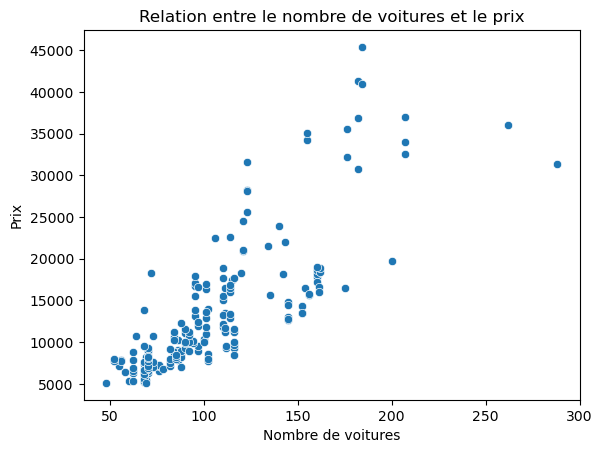

In [56]:
sns.scatterplot(x='chevaux', y='prix', data=df)
plt.xlabel('Nombre de voitures')
plt.ylabel('Prix')
plt.title('Relation entre le nombre de voitures et le prix')
plt.show()

Ce graphique représente la relation entre la puissance du moteur et le prix des voitures. On peut observer que plus la puissance du moteur est élevée, plus le prix de la voiture est élevé. Il y a également une grande dispersion des points, ce qui suggère que d'autres facteurs influencent également le prix des voitures. Il serait intéressant d'effectuer une analyse multivariée pour déterminer l'importance relative de ces facteurs.

|--------------------------------------------------------------------------------------------------------------------------------------|

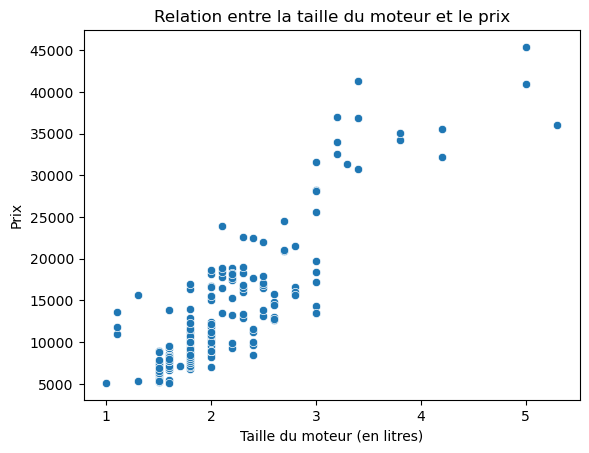

In [57]:
sns.scatterplot(x='taille_moteur', y='prix', data=df)
plt.xlabel('Taille du moteur (en litres)')
plt.ylabel('Prix')
plt.title('Relation entre la taille du moteur et le prix')
plt.show()

Le graphique montre la relation entre la taille du moteur et le prix des voitures. On peut observer une tendance positive entre les deux variables, ce qui signifie que les voitures avec des tailles de moteur plus importantes ont tendance à être plus chères que les voitures avec des moteurs plus petits. 
Cependant, il y a également une grande variabilité dans les prix pour chaque taille de moteur, ce qui suggère que d'autres facteurs sont également importants pour déterminer le prix des voitures.

|--------------------------------------------------------------------------------------------------------------------------------------|

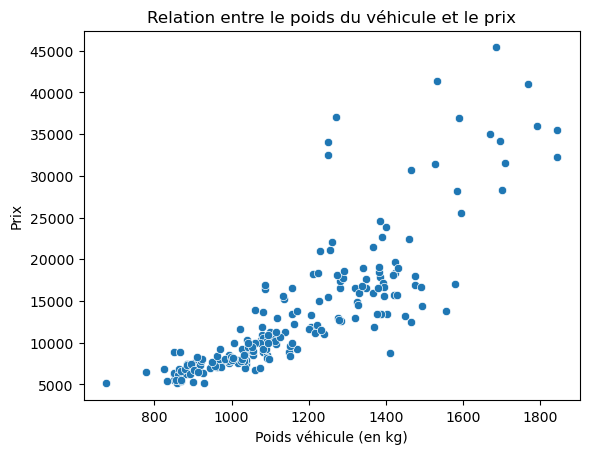

In [58]:
sns.scatterplot(x='poids_vehicule', y='prix', data=df)
plt.xlabel('Poids véhicule (en kg)')
plt.ylabel('Prix')
plt.title('Relation entre le poids du véhicule et le prix')
plt.show()

On peut observer une tendance positive entre le prix et le poids du véhicule, ce qui suggère que les véhicules plus lourds sont généralement plus chers que les véhicules plus légers. 
Cependant, il y a également beaucoup de dispersion autour de la ligne de tendance, on peut supposer qu'il y a de nombreuses exceptions à cette relation. Il est important de noter que la relation peut ne pas être causale, car il y a probablement d'autres facteurs qui influencent le prix des véhicules.

|--------------------------------------------------------------------------------------------------------------------------------------|

## Export data

In [59]:
df.to_csv('./src/car_dataset_cleaned.csv', index=False)

In [60]:
df.dtypes

etat_de_route               int64
carburant                  object
turbo                      object
nombre_portes               int64
type_vehicule              object
transmission               object
emplacement_moteur         object
empattement               float64
longueur_voiture          float64
largeur_voiture           float64
hauteur_voiture           float64
poids_vehicule            float64
type_moteur                object
nombre_cylindres            int64
taille_moteur             float64
systeme_carburant          object
taux_alésage              float64
course                    float64
taux_compression          float64
chevaux                     int64
tour_moteur                 int64
consommation_ville        float64
consommation_autoroute    float64
prix                      float64
marque                     object
modele                     object
dtype: object